In [1]:
import math
import pandas as pd
import pandas_datareader as pdr
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [2]:
df = pdr.DataReader('AAPL',data_source='yahoo',start='2013-01-01',end='2019-12-30')

In [3]:
df

High        Low       Open      Close       Volume  Adj Close
Date                                                                          
2012-12-31  19.121429  18.178572  18.233213  19.006071  659492400.0  16.488508
2013-01-02  19.821428  19.343929  19.779285  19.608213  560518000.0  17.010899
2013-01-03  19.631071  19.321428  19.567142  19.360714  352965200.0  16.796177
2013-01-04  19.236786  18.779642  19.177500  18.821428  594333600.0  16.328323
2013-01-07  18.903570  18.400000  18.642857  18.710714  484156400.0  16.232281
...               ...        ...        ...        ...          ...        ...
2019-12-23  71.062500  70.092499  70.132500  71.000000   98572000.0  70.167885
2019-12-24  71.222504  70.730003  71.172501  71.067497   48478800.0  70.234581
2019-12-26  72.495003  71.175003  71.205002  72.477501   93121200.0  71.628067
2019-12-27  73.492500  72.029999  72.779999  72.449997  146266000.0  71.600876
2019-12-30  73.172501  71.305000  72.364998  72.879997  144114400.0  72.025833

[1762 rows x 6 columns]

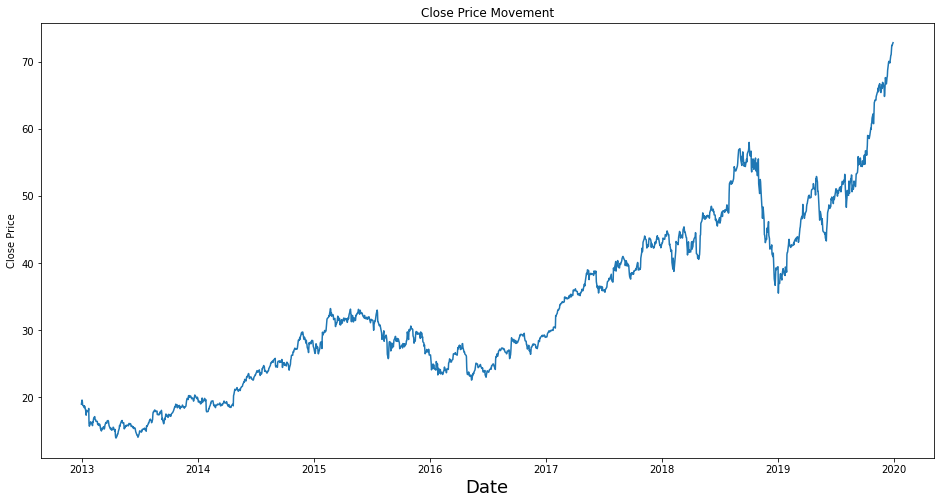

In [4]:
plt.figure(figsize=(16,8))
plt.title("Close Price Movement")
plt.plot(df['Close'])
plt.xlabel("Date",fontsize=18)
plt.ylabel("Close Price")
plt.show()

In [5]:
data = df.filter(['Close'])
dataset = data.values

In [6]:
dataset

array([[19.00607109],
       [19.60821342],
       [19.36071396],
       ...,
       [72.47750092],
       [72.44999695],
       [72.87999725]])

In [7]:
len(dataset)

1762

In [8]:
training_data_size = math.ceil(len(dataset)*.7)
training_data_size

1234

In [9]:
sc = MinMaxScaler(feature_range = (0, 1))
scaled_data = sc.fit_transform(dataset)
scaled_data

array([[0.0858367 ],
       [0.09605419],
       [0.09185448],
       ...,
       [0.99317021],
       [0.99270351],
       [1.        ]])

In [10]:
train_data = scaled_data[0:training_data_size,:]
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<=61:
        print(x_train)
        print(y_train)

[array([0.0858367 , 0.09605419, 0.09185448, 0.08270357, 0.08082492,
       0.08167938, 0.07670398, 0.08058859, 0.07864326, 0.06740158,
       0.05780827, 0.07003168, 0.06796515, 0.06634104, 0.06923175,
       0.07483138, 0.03634305, 0.0299071 , 0.035937  , 0.0410518 ,
       0.04017914, 0.03936707, 0.03823381, 0.03138579, 0.04079123,
       0.04049428, 0.04708171, 0.05117841, 0.05417819, 0.04688778,
       0.04634842, 0.0460939 , 0.04219719, 0.04209414, 0.0353431 ,
       0.03365229, 0.03653089, 0.03167668, 0.03541582, 0.03274932,
       0.03082825, 0.02420445, 0.01788972, 0.02461047, 0.02128948,
       0.02427111, 0.02496197, 0.02868899, 0.02296816, 0.02291968,
       0.02543468, 0.03219786, 0.03950647, 0.03876107, 0.03730053,
       0.03769445, 0.04325773, 0.04426978, 0.04279109, 0.03730053])]
[0.03159183782585581]
[array([0.0858367 , 0.09605419, 0.09185448, 0.08270357, 0.08082492,
       0.08167938, 0.07670398, 0.08058859, 0.07864326, 0.06740158,
       0.05780827, 0.07003168, 0.067

In [11]:
train_data[1:61,0]

array([0.09605419, 0.09185448, 0.08270357, 0.08082492, 0.08167938,
       0.07670398, 0.08058859, 0.07864326, 0.06740158, 0.05780827,
       0.07003168, 0.06796515, 0.06634104, 0.06923175, 0.07483138,
       0.03634305, 0.0299071 , 0.035937  , 0.0410518 , 0.04017914,
       0.03936707, 0.03823381, 0.03138579, 0.04079123, 0.04049428,
       0.04708171, 0.05117841, 0.05417819, 0.04688778, 0.04634842,
       0.0460939 , 0.04219719, 0.04209414, 0.0353431 , 0.03365229,
       0.03653089, 0.03167668, 0.03541582, 0.03274932, 0.03082825,
       0.02420445, 0.01788972, 0.02461047, 0.02128948, 0.02427111,
       0.02496197, 0.02868899, 0.02296816, 0.02291968, 0.02543468,
       0.03219786, 0.03950647, 0.03876107, 0.03730053, 0.03769445,
       0.04325773, 0.04426978, 0.04279109, 0.03730053, 0.03159184])

In [12]:
x_train,Y_train = np.array(x_train),np.array(y_train)
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1174, 60, 1)

In [13]:
model = Sequential()
model.add(LSTM(units = 50, return_sequences = True, input_shape = (60, 1)))
model.add(LSTM(units = 50, return_sequences = False))
model.add(Dense(units = 50))
model.add(Dense(units = 1))


In [14]:
#print((x_train.shape[1], 1))

In [15]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')


In [16]:
model.fit(x_train, Y_train, epochs = 100, batch_size = 70)

Epoch 1/100
17/17 [==============================] - 16s 43ms/step - loss: 0.0216
Epoch 2/100
17/17 [==============================] - 1s 51ms/step - loss: 0.0026
Epoch 3/100
17/17 [==============================] - 1s 58ms/step - loss: 4.6052e-04
Epoch 4/100
17/17 [==============================] - 1s 60ms/step - loss: 3.1732e-04
Epoch 5/100
17/17 [==============================] - 1s 60ms/step - loss: 2.6628e-04
Epoch 6/100
17/17 [==============================] - 1s 59ms/step - loss: 2.6321e-04
Epoch 7/100
17/17 [==============================] - 1s 59ms/step - loss: 2.5828e-04
Epoch 8/100
17/17 [==============================] - 1s 70ms/step - loss: 2.4049e-04
Epoch 9/100
17/17 [==============================] - 1s 59ms/step - loss: 2.5482e-04
Epoch 10/100
17/17 [==============================] - 1s 58ms/step - loss: 2.2932e-04
Epoch 11/100
17/17 [==============================] - 1s 58ms/step - loss: 2.2440e-04
Epoch 12/100
17/17 [==============================] - 1s 57ms/step - l

17/17 [==============================] - 1s 73ms/step - loss: 9.8369e-05
Epoch 97/100
17/17 [==============================] - 1s 70ms/step - loss: 6.8328e-05
Epoch 98/100
17/17 [==============================] - 1s 63ms/step - loss: 6.1329e-05
Epoch 99/100
17/17 [==============================] - 1s 65ms/step - loss: 6.3878e-05
Epoch 100/100
17/17 [==============================] - 1s 66ms/step - loss: 5.4809e-05


In [17]:
test_data = scaled_data[training_data_size-60: ,:]
x_test = []
y_test = dataset[training_data_size:,:]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i,0])
    

In [18]:
x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))


In [19]:
prediction = model.predict(x_test)
prediction = sc.inverse_transform(prediction)

In [20]:
mse = np.mean(prediction-y_test)**2
mse#0.0901136071694135

0.46198882782365475

In [21]:
rmse = np.sqrt(np.mean(prediction-y_test)**2)
rmse#0.3001892855673125

0.6796976002779874

<ipython-input-22-97b78dffa0fd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['prediction'] = prediction


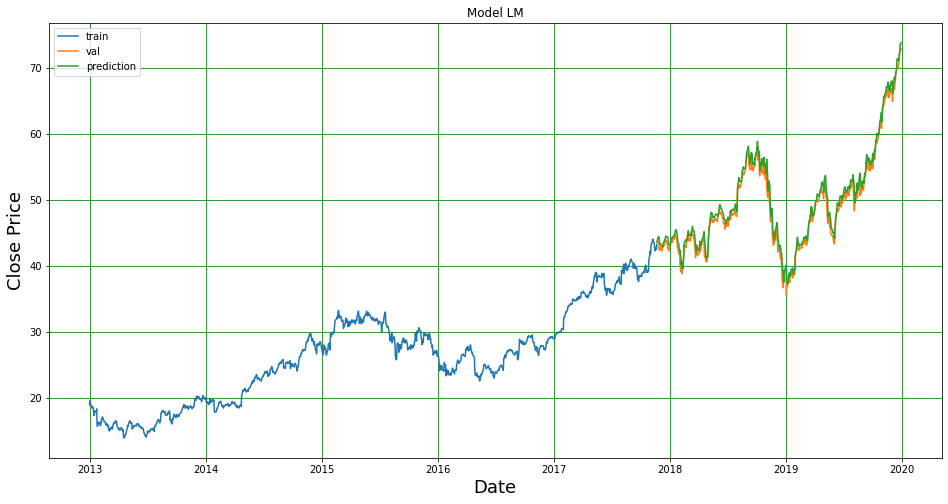

In [22]:
train = data[:training_data_size]
valid = data[training_data_size:]
valid['prediction'] = prediction

plt.figure(figsize=(16,8))
plt.title("Model LM")
plt.xlabel("Date",fontsize=18)
plt.ylabel("Close Price",fontsize=18)
plt.plot(train['Close'])
plt.grid(color='g', linestyle='-')
plt.plot(valid[['Close','prediction']])
plt.legend(['train','val','prediction'])
plt.show()

In [23]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
valid.tail()

Close  prediction
Date                             
2019-12-23  71.000000   71.058334
2019-12-24  71.067497   71.973244
2019-12-26  72.477501   72.252632
2019-12-27  72.449997   73.520721
2019-12-30  72.879997   73.779617

In [24]:
difference = pd.DataFrame(valid['Close']-valid['prediction'])
difference.tail()


0
Date                
2019-12-23 -0.058334
2019-12-24 -0.905746
2019-12-26  0.224869
2019-12-27 -1.070724
2019-12-30 -0.899620

In [25]:
72.879997 - 71.397034
#72.879997-71.999016     #0.8809810000000056
#73.558174-72.879997   #0.6781769999999909

1.482962999999998

In [26]:
#valid = pd.concat(difference)

<ipython-input-27-6c2c982982eb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['prediction'] = prediction


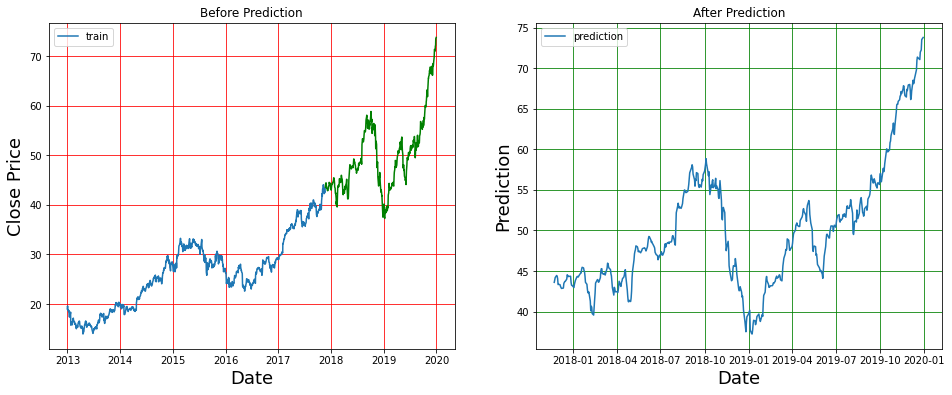

In [27]:
train = data[:training_data_size]
valid = data[training_data_size:]
valid['prediction'] = prediction

plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.title("Before Prediction")
plt.xlabel("Date",fontsize=18)
plt.ylabel("Close Price",fontsize=18)
plt.plot(train['Close'])
plt.grid(color='r', linestyle='-')
plt.plot(valid['prediction'],color='green')
plt.legend(['train'])


plt.subplot(1,2,2)
plt.title("After Prediction")
plt.xlabel("Date",fontsize=18)
plt.ylabel("Prediction",fontsize=18)
#plt.plot(train['Close'])
plt.grid(color='g', linestyle='-')
plt.plot(valid['prediction'])
plt.legend(['prediction'])
plt.show()

In [28]:
model.save("Appl.h5")